In [49]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm , preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
def meanResult(scoring):
    return {i:j.mean() for i,j in scoring.items()}

# Loading the datset

In [40]:
data = pd.read_csv("dataset.csv",index_col=0)

# Preprocessing of data

In [41]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11055 entries, 1 to 11055
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int32
 1   URLURL_Length                11055 non-null  int32
 2   Shortining_Service           11055 non-null  int32
 3   having_At_Symbol             11055 non-null  int32
 4   double_slash_redirecting     11055 non-null  int32
 5   Prefix_Suffix                11055 non-null  int32
 6   having_Sub_Domain            11055 non-null  int32
 7   SSLfinal_State               11055 non-null  int32
 8   Domain_registeration_length  11055 non-null  int32
 9   Favicon                      11055 non-null  int32
 10  port                         11055 non-null  int32
 11  HTTPS_token                  11055 non-null  int32
 12  Request_URL                  11055 non-null  int32
 13  URL_of_Anchor                11055 non-null  i

In [72]:
data.rename(columns={'Result': 'labels'}, inplace=True)

# Viewing the data

In [73]:
data.sample(5)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,labels
index,,,,,,,,,,,,,,,,,,,,,
1775,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,-1,1,1,1,1,0,1,1
4314,1,-1,1,1,1,-1,0,1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
4343,1,-1,1,1,1,-1,0,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,0,-1,-1
7336,-1,-1,1,1,1,-1,1,0,1,1,...,1,1,-1,1,-1,1,1,1,1,-1
1473,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,1,0,1,-1


In [74]:
data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,labels
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

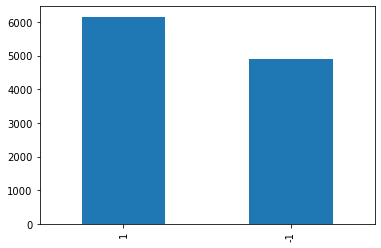

In [75]:
data['labels'].value_counts().plot(kind='bar')

In [76]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'index' in temp.columns:
        del temp['index']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\1252062066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['labels'] = y


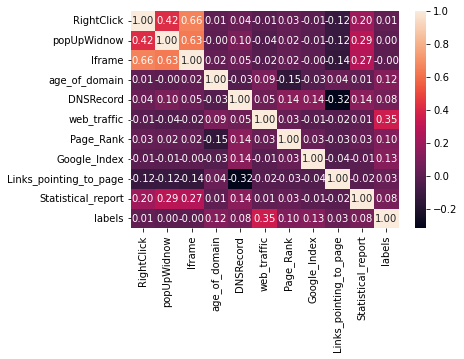

In [77]:
corr_heatmap(data, 20, 30)

# Models

## Decision tree:

In [80]:
data = sklearn.utils.shuffle(data)
X = data.drop("labels",axis=1).values
X = preprocessing.scale(X)
y = data['labels'].values
data.head()
output_matrix = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1'}
fold_count=10
dtree_clf=DecisionTreeClassifier()
cross_val_scores = cross_validate(dtree_clf, X, y, cv=fold_count, scoring=output_matrix)
dtree_score = meanResult(cross_val_scores)
print(dtree_score)

{'fit_time': 0.044534921646118164, 'score_time': 0.0073338508605957035, 'test_accuracy': 0.9653531948319737, 'test_recall': 0.9709244008024495, 'test_precision': 0.9670236214974903, 'test_f1': 0.9689545875498622}


# Random Forest

In [81]:
rforest_clf=RandomForestClassifier()
cross_val_scores = cross_validate(rforest_clf, X, y, cv=fold_count, scoring=output_matrix)
rforest_clf_score = meanResult(cross_val_scores)
print(rforest_clf_score)

{'fit_time': 1.185907769203186, 'score_time': 0.055217647552490236, 'test_accuracy': 0.9730434569153854, 'test_recall': 0.9818089430894309, 'test_precision': 0.9702077415957028, 'test_f1': 0.9759488899279247}


# Ada_booster

In [84]:
adaboost_clf=AdaBoostClassifier()
cross_val_scores = cross_validate(adaboost_clf, X, y, cv=fold_count, scoring=output_matrix)
adaboost_clf_score = meanResult(cross_val_scores)
print(adaboost_clf_score)

{'fit_time': 0.43334991931915284, 'score_time': 0.018102073669433595, 'test_accuracy': 0.9376756973480728, 'test_recall': 0.9553378735086053, 'test_precision': 0.9343090901738543, 'test_f1': 0.9446769423482853}


## Histogram-Based Gradient Boosting


In [87]:
histGradientBooster_clf = HistGradientBoostingClassifier()
cross_val_scores = cross_validate(histGradientBooster_clf,X, y, cv=fold_count, scoring=output_matrix)
histGradientBooster_clf_score= meanResult(cross_val_scores)
print(histGradientBooster_clf_score)

{'fit_time': 0.9769060134887695, 'score_time': 0.010268855094909667, 'test_accuracy': 0.9687918633860555, 'test_recall': 0.9766114982578398, 'test_precision': 0.9677069624065011, 'test_f1': 0.9721182979563547}


## Gradient Boosting With XGBoost

In [91]:
gradientBooster_clf=GradientBoostingClassifier()
cross_val_scores = cross_validate(gradientBooster_clf,X, y, cv=fold_count, scoring=output_matrix)
gradientBooster_clf_score= meanResult(cross_val_scores)
print(gradientBooster_clf_score)

{'fit_time': 1.0690820932388305, 'score_time': 0.010296034812927245, 'test_accuracy': 0.9493436050174695, 'test_recall': 0.9632918910357933, 'test_precision': 0.9467283099997965, 'test_f1': 0.954923202607674}


## KNN

In [92]:
KNeighbors_clf=KNeighborsClassifier(3)
cross_val_scores = cross_validate(KNeighbors_clf, X, y, cv=fold_count, scoring=output_matrix)
KNeighbors_clf_score = meanResult(cross_val_scores)
print(KNeighbors_clf_score)

{'fit_time': 0.0051096916198730465, 'score_time': 0.3144343852996826, 'test_accuracy': 0.9496157528249858, 'test_recall': 0.9603719248231443, 'test_precision': 0.9498189232207725, 'test_f1': 0.9550281375346762}


## linear

In [94]:
linear_clf = svm.SVC(kernel='linear')
cross_val_scores = cross_validate(linear_clf, X, y, cv=fold_count, scoring=output_matrix)
linear_svc_clf_score = meanResult(cross_val_scores)
print(linear_svc_clf_score)



{'fit_time': 2.466252875328064, 'score_time': 0.07783284187316894, 'test_accuracy': 0.9285391897752285, 'test_recall': 0.9472133354450429, 'test_precision': 0.9262044404481848, 'test_f1': 0.93654689694447}
